<a href="https://colab.research.google.com/github/Bedadeepa/MachineLearning_algo_Supervised/blob/main/Mobile_price_segmentation_and_classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
path="/gdrive/MyDrive/Colab_data_file/mobil_price"

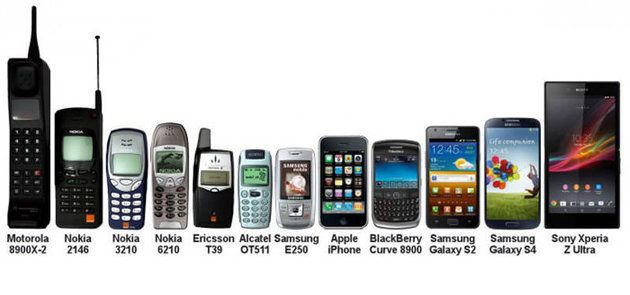

#Call Libraries


**Let's invite the party people here because without them our exploratin party is impossible**

In [ ]:
# 1.1 For data manipulations
import numpy as np
import pandas as pd
from numpy.random import default_rng

# 1.2 For plotting
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl     # For creating colormaps

# 1.3 For data processing
from sklearn.preprocessing import StandardScaler

# 1.4 OS related
import os
# import required libraries clustering 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import SilhouetteVisualizer
#import required libraries for classification 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Import class DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier as dtree
from sklearn.tree import plot_tree

# For encoding target class values
from sklearn.preprocessing import LabelEncoder

# Splitting data
from sklearn.model_selection import train_test_split                # Returns split data



In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"



#Exploration And Cleening

**First and foremost it is important to have a look at data to get a clear sense on what we work on.**

##Read Data
####Load datasets for demonstrations

In [ ]:
os.chdir(path)

In [ ]:
train= pd.read_csv("train.csv")

In [ ]:
#Look at data
train.shape                        
print()
train.head(10)

(2000, 21)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [ ]:
#Check if there are Missing/duplicate values? 
train.isnull().sum()           
print("\n----------")
train.isnull().sum().sum()      
print("\n------------")
train.duplicated().sum()        

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


----------


0


------------


0

In [ ]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
#Displaying the data types
train.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

#Visualisation

##Let's have some Questions

1.   How does price_range varies with primary camera? 
2.   How does wifi feature change Price_range?
3.   How does Dual_sim changes Price_range?
4.   How does price_range varies with front camera?
5.   How does Battery_power effects Price_range?
6.   How does internal memory effect Price_range?
7.   How does Price_range varies for RAM size?
8.   compare battery power with n_cores
9.   show how many Number of phone has dual_sim.
10.  show how many Number of phones has wifi feature.
11.  Display price_range of 4G phones.
12.  check the price_range of 3G supported phone .
 

##Here is the answers of the above question

***How does price_range varies with primary camera?***

---



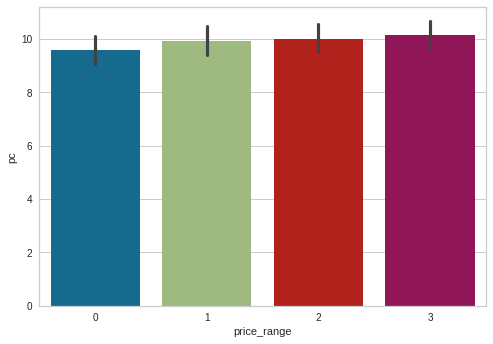

In [ ]:
pc_cam=train[['price_range']].groupby(train['pc']).sum()
sns.barplot(data=pc_cam,x=train['price_range'], y=train['pc'] );

***How does wifi feature change Price_range?***

---



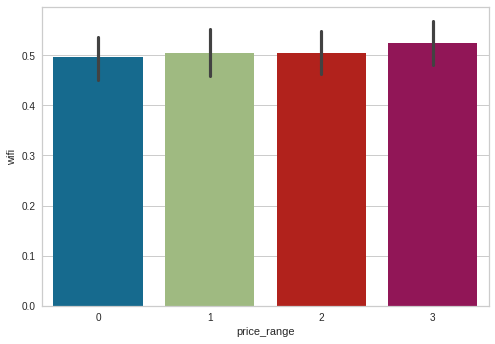

In [ ]:
sns.barplot(data=train, x=train['price_range'], y=train['wifi']);

***How does Dual_sim changes Price_range?***

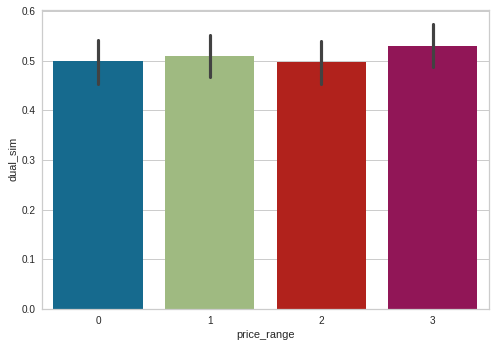

In [ ]:
sns.barplot(data=train, x=train['price_range'], y=train['dual_sim']);

***How does price_range varies with front camera ?***

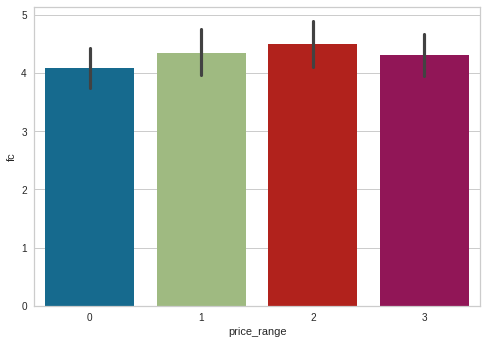

In [ ]:
front_cam=train[['price_range']].groupby(train['fc']).sum()
sns.barplot(data=front_cam,x=train['price_range'], y=train['fc'] );

***How does Battery_power effects Price_range?***

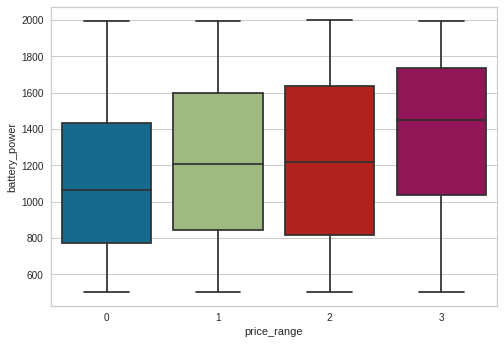

In [ ]:
df=train[['price_range']].groupby(train['battery_power']).sum()
df.reset_index(inplace=True)
sns.boxplot(data=df,y=train['battery_power'], x=train['price_range']);

***How does internal memory effect Price_range?***

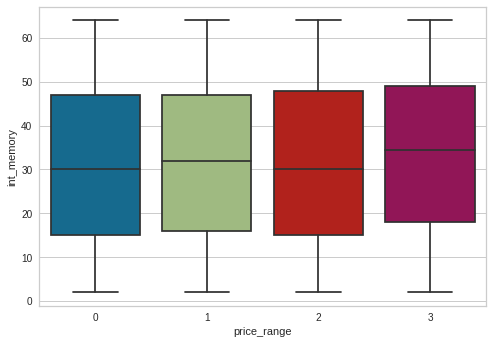

In [ ]:
grp=train[['price_range']].groupby(train['int_memory']).sum()
sns.boxplot(data=grp, x=train['price_range'], y=train['int_memory']);

***How does Price_range varies for RAM size?***

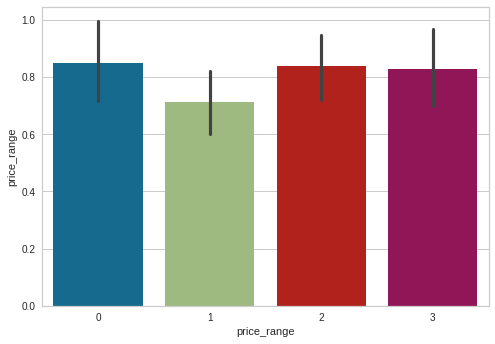

In [ ]:
rs=train['price_range'].groupby(train['ram']).sum()
sns.barplot(data=rs, x=train['price_range'], y=train['ram']);

***compare battery power with n_cores***

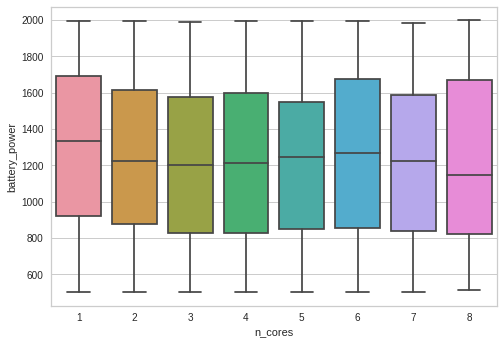

In [ ]:
sns.boxplot(data=train, x=train['n_cores'], y=train['battery_power']);

***show how many Number of phone has dual_sim.***

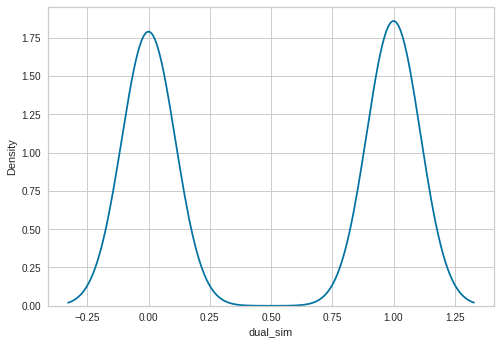

In [ ]:
sns.kdeplot(data=train, x=train['dual_sim']);

***show how many Number of phones has wifi feature.***

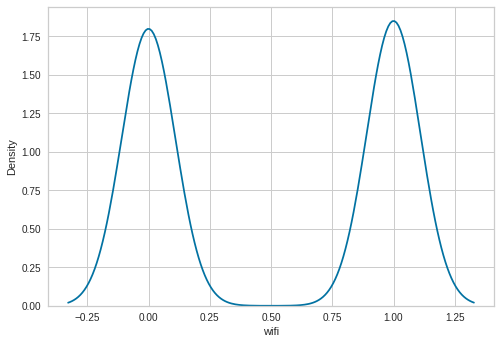

In [ ]:
sns.kdeplot(data=train, x=train['wifi']);

***Display price_range of 4G phones.***

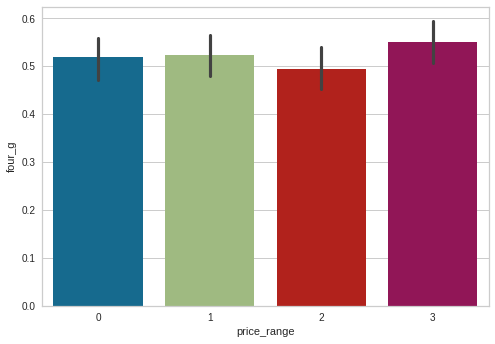

In [ ]:
sns.barplot(data=train, x=train['price_range'], y=train['four_g']);

***check the price_range of 3G supported phone .***

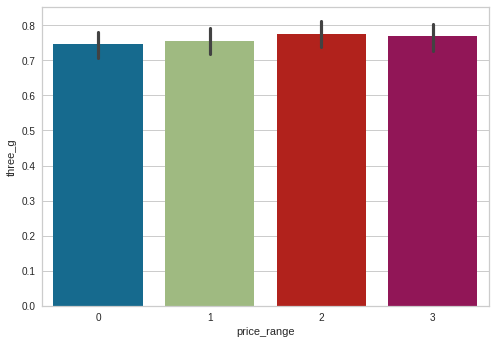

In [ ]:
sns.barplot(data=train, x=train['price_range'], y=train['three_g']);

#Clustering

*Clustering data preparation*

In [ ]:
X=train.drop('price_range', axis=1)
y=train['price_range']
X.shape

(2000, 20)

####Scaling the data using Standardisation

instantiate

In [ ]:
scaler=StandardScaler()

In [ ]:
# fit_transform 
train_scaled = scaler.fit_transform(X)
train_scaled.shape

(2000, 20)

In [ ]:
#create kmeans object
kmeans=KMeans(n_clusters=5, max_iter=300)
kmeans.fit(train_scaled)

KMeans(n_clusters=5)

**Calculating the SSE value**

In [ ]:
kmeans.inertia_

33321.49904569282

***Checking cluster centers*** 

In [ ]:
kmeans.cluster_centers_

array([[ 9.34186086e-02, -4.94925597e-02,  5.88440142e-02,
        -7.28375110e-02,  1.49316436e+00,  2.20660185e-01,
        -1.66058989e-01, -5.22448084e-02,  1.07428797e-01,
        -2.93985257e-02,  1.11181719e+00, -4.34703196e-02,
        -7.57038179e-02,  1.45845536e-01, -1.50779443e-01,
        -2.54810018e-01,  4.82898372e-02,  4.79872872e-01,
         7.04885209e-02,  3.41619883e-02],
       [-3.51424728e-02,  1.89030223e-02, -2.04777009e-01,
        -1.22879749e-01, -4.13140903e-01,  3.10402827e-01,
         8.54376255e-02,  6.39100434e-02,  1.81179189e-02,
         4.48769227e-02, -3.49879303e-01,  1.24616551e+00,
         1.02511064e+00,  4.32826472e-02,  2.95672399e-01,
         1.78179509e-01, -1.12829510e-01,  5.10900242e-01,
         1.09728978e-01,  2.14507670e-01],
       [-9.82347765e-02,  5.06529392e-02,  3.61749338e-02,
        -2.98156803e-05, -3.09195750e-01,  4.09953703e-01,
         6.36145022e-02, -5.49419161e-02, -1.73202022e-01,
         8.76012338e-02, -2.0

**Number of iterations**

In [ ]:
kmeans.n_iter_

28

**Number of features seen during fit**

In [ ]:
kmeans.n_features_in_

20

In [ ]:
cluster_labels=kmeans.labels_
cluster_labels

array([3, 1, 1, ..., 4, 2, 2], dtype=int32)

In [ ]:
#SSE or Intra-cluster variance

kmeans.inertia_

33321.49904569282

**Checking silhouette score**

In [ ]:
silhoutte_avg=silhouette_score(train_scaled,cluster_labels )
print("The silhouette score is: {0}".format(silhoutte_avg))

The silhouette score is: 0.05386449034936602


In [ ]:
 #optimizing the clusters 
sse=[]
s_score=[]
max_k=14
for num_custer in range(2,max_k):
  model=KMeans(n_clusters=num_custer, max_iter=60)
  model.fit(train_scaled)
  # SSE:Store inertia value
  sse.append(model.inertia_)
  #silhouette_score
  sc=silhouette_score(train_scaled, model.labels_, sample_size=1000)
  s_score.append(sc)

KMeans(max_iter=60, n_clusters=2)

KMeans(max_iter=60, n_clusters=3)

KMeans(max_iter=60, n_clusters=4)

KMeans(max_iter=60, n_clusters=5)

KMeans(max_iter=60, n_clusters=6)

KMeans(max_iter=60, n_clusters=7)

KMeans(max_iter=60)

KMeans(max_iter=60, n_clusters=9)

KMeans(max_iter=60, n_clusters=10)

KMeans(max_iter=60, n_clusters=11)

KMeans(max_iter=60, n_clusters=12)

KMeans(max_iter=60, n_clusters=13)

***Scree plot***

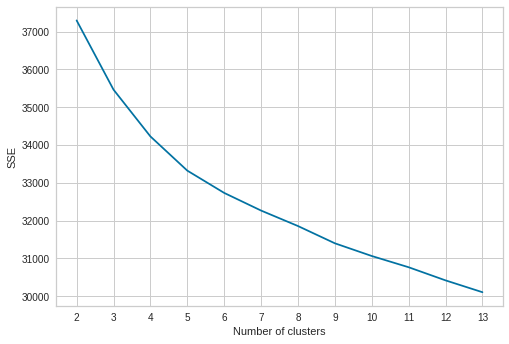

In [ ]:
plt.plot(range(2,max_k), sse )
plt.xticks(range(2,max_k))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show(); #plotting  Elbow plot of inertia

***Displaying the silhouette scores***


In [ ]:
s_score

[0.06725037304577444,
 0.06560671066645396,
 0.05772836787258757,
 0.05519107573118807,
 0.04705679563658699,
 0.0494530641772113,
 0.04825247874509314,
 0.04692203964829637,
 0.04444428193773777,
 0.04382097726546975,
 0.04377096328078055,
 0.044835490266135154]

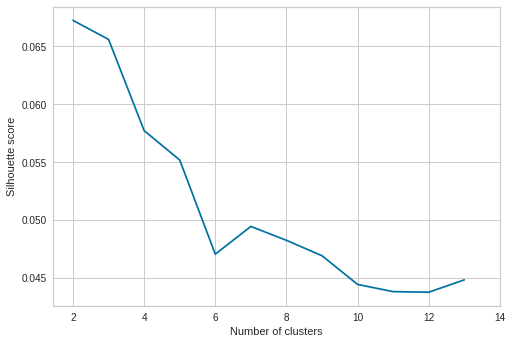

In [ ]:
#Silhouette score plot
plt.plot(range(2,max_k), s_score)
plt.xticks(range(2,15,2))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.show();

**let's plot silhouette plot of K-means clustering**

In [ ]:
visualizer = SilhouetteVisualizer(
                                  model,
                                  colors='yellowbrick'
                                  )

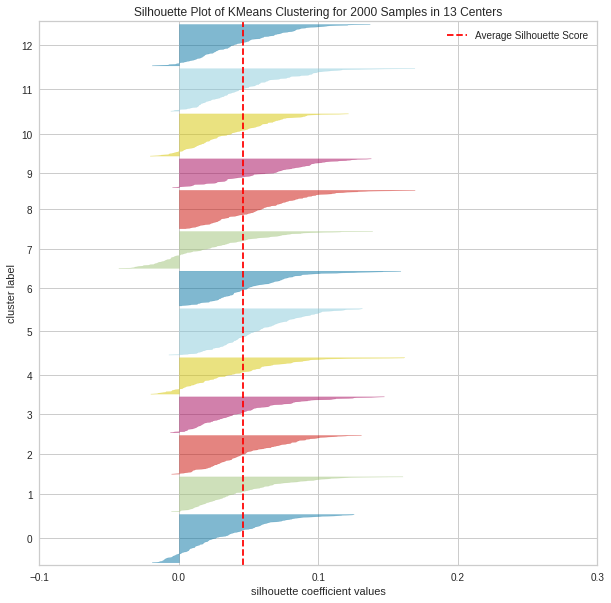

In [ ]:
fig=plt.figure(figsize=(10,10));
visualizer.fit(train_scaled);
visualizer.show();

#Classification

Preparing the classification data

In [ ]:
X=train.iloc[:, 1:-1].values
y=train.iloc[:,-1]

In [ ]:
# instantiate object
stdsclr=StandardScaler()
# Train object on data
stdsclr.fit(X)
# Transform data
X=stdsclr.transform(X)

StandardScaler()

**Split X and y into train and test data**

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, shuffle=True, random_state=20)

In [ ]:
X_train.shape

(1600, 19)

In [ ]:
X_test.shape

(400, 19)

In [ ]:
X_train                         # X train data
y_train                         # y train data
y_test                          # y test data

array([[-0.9900495 , -1.00790612,  0.98117712, ...,  0.55964063,
        -1.00601811, -1.01409939],
       [ 1.0100505 ,  0.21788424, -1.01918398, ...,  0.55964063,
        -1.00601811,  0.98609664],
       [-0.9900495 ,  1.68883267, -1.01918398, ..., -1.78686097,
        -1.00601811,  0.98609664],
       ...,
       [-0.9900495 ,  0.70820038,  0.98117712, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-0.9900495 , -0.76274805, -1.01918398, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.9900495 ,  1.68883267, -1.01918398, ..., -1.78686097,
         0.99401789, -1.01409939]])

1500    2
451     1
1627    3
669     1
1567    1
       ..
924     2
1247    1
271     0
474     2
1379    1
Name: price_range, Length: 1600, dtype: int64

1556    3
1560    2
1559    2
1594    1
906     3
       ..
959     3
1939    2
668     3
534     2
1111    3
Name: price_range, Length: 400, dtype: int64

#Decision tree modeling

In [ ]:
#Start modeling
#  initialize our decision tree object
ct = dtree(
           criterion = "gini",
           max_depth = None,
           )

In [ ]:
 #Fit data X and y
ct.fit(X_train,y_train)

DecisionTreeClassifier()

**Pridiction**

In [ ]:
#Makeing pridiction of test data
y_te = ct.predict(X_test)

In [ ]:
np.sum(y_test == y_te)/y_test.size   #Get accuracy

0.715

###***Decision tree***

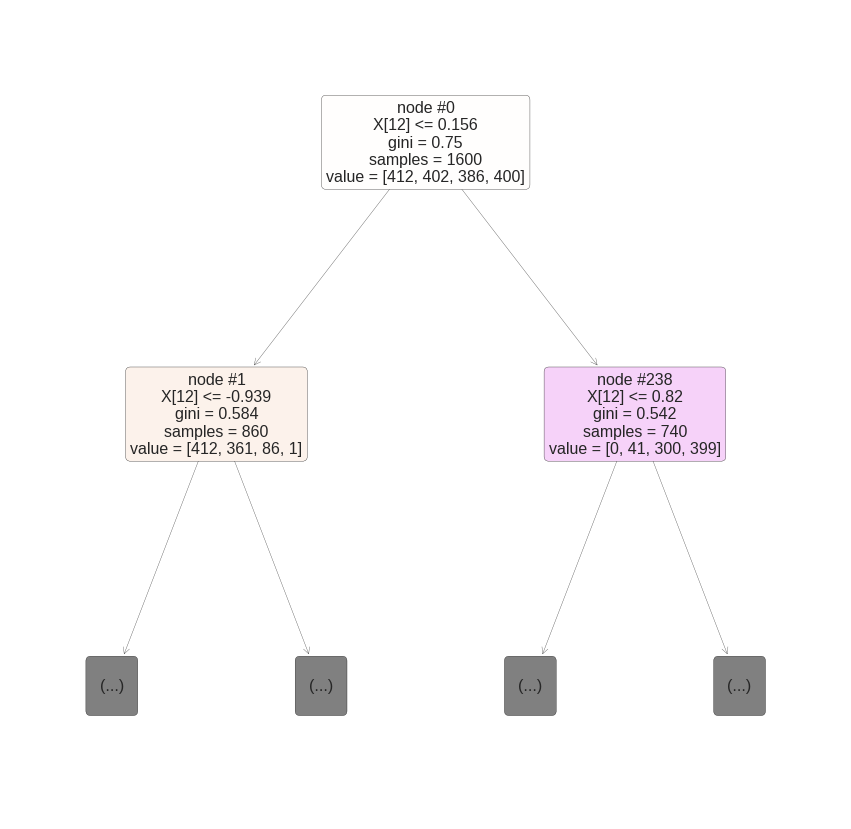

In [ ]:
#Decision treeploting
plt.figure(figsize = (15,15))
plot_tree(ct,
          max_depth= 1,
          rounded = True,
          filled = True,
          impurity = True,
          node_ids = True,
          )
plt.show();